In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib
import os.path
import re
!pip install tld
!pip install tldextract
from tld import get_tld
from tld import is_tld
import tldextract
data = pd.read_csv("Malicious_URLs.csv")
#data = data[:100]
data.head


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<bound method NDFrame.head of                                                      url
0                              https://ervashipping.com/
1        http://www.gabung-grupmabarcimbrut.duckdns.org/
2              http://republik-jancuk.000webhostapp.com/
3             https://www.chet-notnkt8-grup.duckdns.org/
4      http://veromcertiom.ddns.net/connexion/certico...
...                                                  ...
10624      http://sites.google.com/site/habbotuttogratis
10625       http://www.habbocreditosparati.blogspot.com/
10626  http://creditiperhabbogratissicuro100.blogspot...
10627  http://mundovirtualhabbo.blogspot.com/2009_01_...
10628  http://aijcs.blogspot.com/2005/03/colourful-li...

[10629 rows x 1 columns]>

In [11]:
domain_list = []
domain_len_list=[]
five_list = []
digit_count_list=[]
unique_count_list = []
tld_list = []
for url in data['url']:
    tld = tldextract.extract(url)
    if is_tld(tld.suffix):
        tld_list.append(tld.suffix)
    else:
        tld_list.append('N/A')
    domain = tldextract.extract(url).domain
    domain_list.append(domain)
    domain_len_list.append(len(domain))
    digits_count_domain = [domain.count(x) for x in "1234567890"]
    digit_count_list.append(sum(digits_count_domain))
    unique_count_domain = len(set(domain))
    unique_count_list.append(unique_count_domain)
    if len(domain) >= 1 and len(domain) <= 5:
        five_list.append('1-5')
    elif len(domain) >= 6 and len(domain) <= 10:
        five_list.append('6-10')
    elif len(domain) >= 11 and len(domain) <= 15:
        five_list.append('11-15')
    elif len(domain) >= 16:   
        five_list.append('16')
data['TLD']= tld_list
data['domain_length'] = domain_len_list
data['ActualDomain']= domain_list
data['rank'] = five_list
data['digit_counts']= digit_count_list
data['unique_counts']= unique_count_list
data

,url,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts
0,https://ervashipping.com/,com,12,ervashipping,11-15,0,10
1,http://www.gabung-grupmabarcimbrut.duckdns.org/,org,7,duckdns,6-10,0,6
2,http://republik-jancuk.000webhostapp.com/,com,13,000webhostapp,11-15,3,10
3,https://www.chet-notnkt8-grup.duckdns.org/,org,7,duckdns,6-10,0,6
4,http://veromcertiom.ddns.net/connexion/certico...,net,4,ddns,1-5,0,3
...,...,...,...,...,...,...,...
10624,http://sites.google.com/site/habbotuttogratis,com,6,google,6-10,0,4
10625,http://www.habbocreditosparati.blogspot.com/,com,8,blogspot,6-10,0,7
10626,http://creditiperhabbogratissicuro100.blogspot...,com,8,blogspot,6-10,0,7
10627,http://mundovirtualhabbo.blogspot.com/2009_01_...,com,8,blogspot,6-10,0,7


In [12]:
data["TLD"].value_counts() 

com             5107
ru               570
net              362
org              303
N/A              200
                ... 
edu.ge             1
mn                 1
edu.mx             1
sk                 1
bialystok.pl       1
Name: TLD, Length: 277, dtype: int64

In [13]:
data["unique_counts"].value_counts() 

8     1427
6     1358
7     1155
10    1136
4     1006
5      991
9      933
11     611
3      560
12     405
13     270
2      233
14     163
15     130
1       99
16      73
17      33
18      20
20      12
23       7
19       4
21       2
22       1
Name: unique_counts, dtype: int64

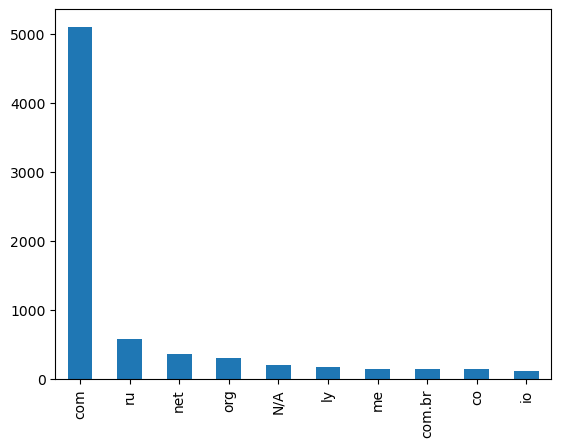

In [14]:
top10_tld_df = data['TLD'].value_counts()[0:10];
top10_tld_df.plot(kind='bar');

In [15]:
strings = ["amazon","ebay", "google","youtube","apple","microsoft","walmart","facebook",
             "instagram", "snapchat"]
b = []
count = 0
for url in data['ActualDomain']:
    for s in strings:
        if s in url:
            count = count +1
            b.append(url)
print(count)
data_from_top_ten_tld = data[data['ActualDomain'].isin(b)]
data_from_top_ten_tld

463


,url,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts
53,https://needupdateto.inamazonjoining.top/signim,top,15,inamazonjoining,11-15,0,8
137,http://ec2-3-128-32-183.us-east-2.compute.amaz...,com,9,amazonaws,6-10,0,7
138,https://needupdateto.inamazonjoining.top/signim/,top,15,inamazonjoining,11-15,0,8
149,http://ec2-3-128-32-183.us-east-2.compute.amaz...,com,9,amazonaws,6-10,0,7
434,http://informationservice.inamazonjoining.cyou/,cyou,15,inamazonjoining,11-15,0,8
...,...,...,...,...,...,...,...
10556,http://customer-ebay.com/survey/cleartext/sond...,com,13,customer-ebay,11-15,0,12
10589,http://sites.google.com/site/libretyreserve,com,6,google,6-10,0,4
10618,https://sites.google.com/site/habbotuttogratis...,com,6,google,6-10,0,4
10623,https://sites.google.com/site/libretyreserve/,com,6,google,6-10,0,4


In [19]:
data_rank = pd.read_csv("Tranco_ranking.csv")
data_rank

,TLD,Score
0,aaa,0.00
1,abb,0.00
2,abbott,0.00
3,abbvie,0.00
4,abc,0.00
...,...,...
996,zip,0.00
997,zm,0.00
998,zone,0.84
999,zuerich,0.00


In [20]:
new_merged_df = pd.merge(data, data_rank, on=['TLD'])
new_merged_df

,url,TLD,domain_length,ActualDomain,rank,digit_counts,unique_counts,Score
0,https://ervashipping.com/,com,12,ervashipping,11-15,0,10,0.17
1,http://republik-jancuk.000webhostapp.com/,com,13,000webhostapp,11-15,3,10,0.17
2,https://hotmail20211.weebly.com/,com,6,weebly,6-10,0,5,0.17
3,https://instagram-mobile.herokuapp.com/,com,9,herokuapp,6-10,0,8,0.17
4,https://www.juedui99.com/pc/,com,8,juedui99,6-10,2,6,0.17
...,...,...,...,...,...,...,...,...
9658,http://albel.intnet.mu/File/file_doc.php?l=_Je...,mu,6,intnet,6-10,0,4,0.00
9659,http://albel.intnet.mu/File/file_doc.php,mu,6,intnet,6-10,0,4,0.00
9660,http://albel.intnet.mu/File/download_doc.php?l...,mu,6,intnet,6-10,0,4,0.00
9661,http://albel.intnet.mu/File/file_doc.php?l=_Je...,mu,6,intnet,6-10,0,4,0.00


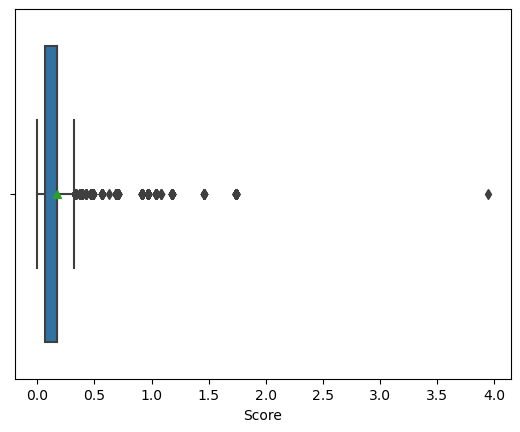

In [21]:
import seaborn as sns
sns.boxplot(x= new_merged_df['Score'], showmeans=True);

In [22]:
new_merged_df.describe()

,domain_length,digit_counts,unique_counts,Score
count,9663.000000,9663.000000,9663.000000,9663.000000
mean,9.972265,0.300424,7.576219,0.168603
std,5.594492,1.701329,3.200885,0.225000
min,1.000000,0.000000,1.000000,0.000000
25%,6.000000,0.000000,5.000000,0.070000
50%,9.000000,0.000000,7.000000,0.170000
75%,13.000000,0.000000,10.000000,0.170000
max,50.000000,33.000000,23.000000,3.950000
